#Exercise: Automated Visual Inspection 

Zhengyang Ling ZL461@cam.ac.uk

#import modules 

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import random 
import math

#Load an image

In [2]:
img_bgr = cv2.imread('example1.png') 

#Pre-process:Changing Color Spaces

(1)rgb

In [3]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

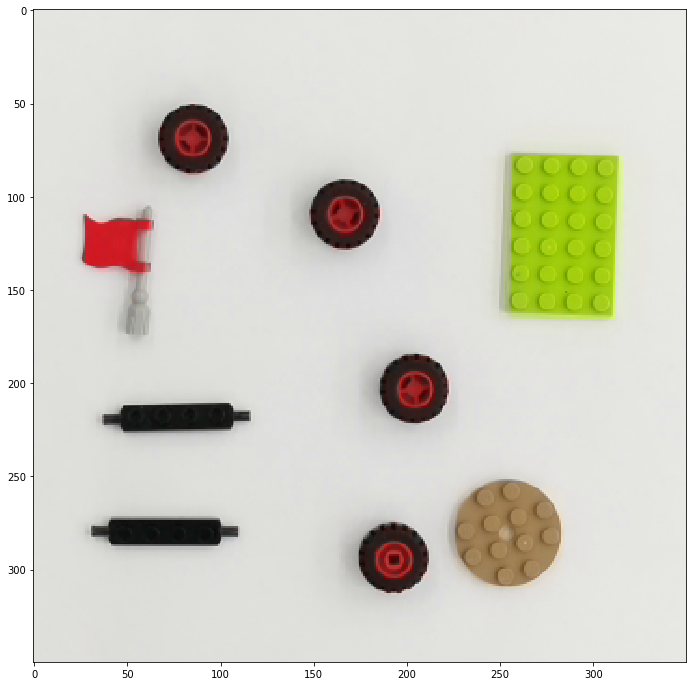

In [4]:
ds=12
plt.figure(figsize = (ds,ds))
plt.imshow(img_rgb)
plt.show()

(2)grey

In [5]:
img_grey = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

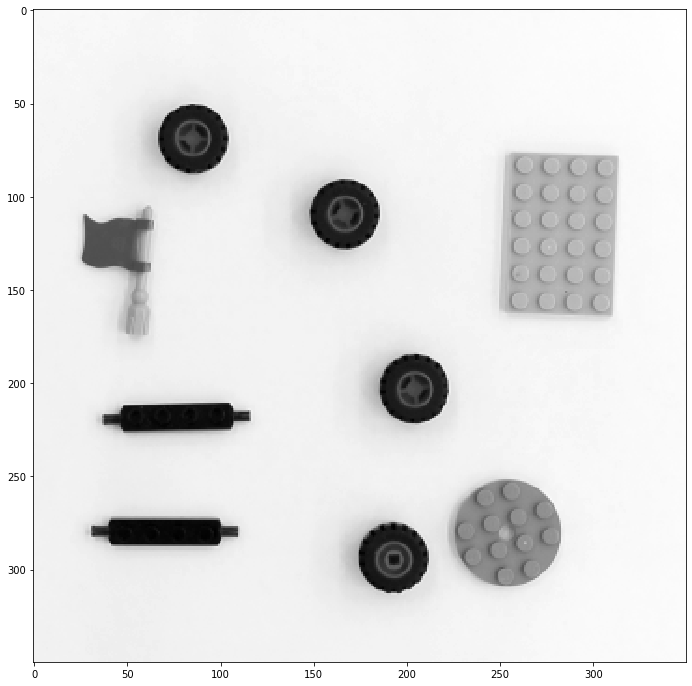

In [6]:
plt.figure(figsize = (ds,ds))
plt.imshow(img_grey,'gray')
plt.show()

(3)hsv

In [7]:
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

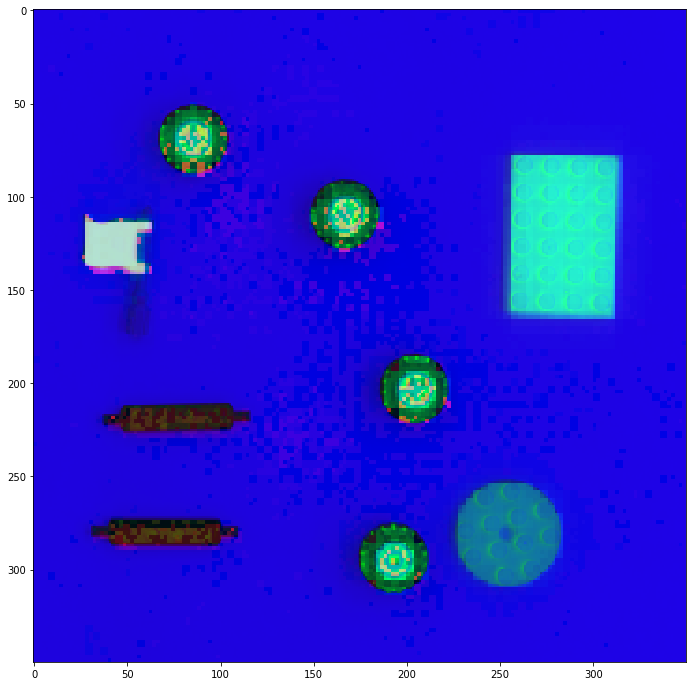

In [8]:
plt.figure(figsize = (ds,ds))
plt.imshow(img_hsv)
plt.show()

(4)color filter

In [9]:
lower = np.array([36,25,25])
upper = np.array([70,255,255])
img_color = cv2.inRange(img_hsv, lower, upper)

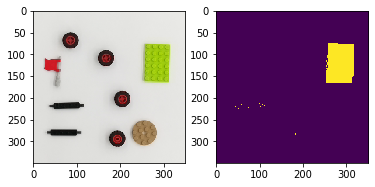

In [10]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(img_rgb)
axarr[1].imshow(img_color)

#Image Pre-Process: Smoothing

(1)region of image

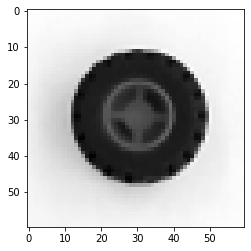

In [11]:
y1=40
h=60
x1=55
w=60
img_roi=img_grey[y1:y1+h,x1:x1+w]
plt.imshow(img_roi,'gray')
plt.show()

(2)filter size 

In [12]:
ksize=5

(3)blur,gaussian_blur,median

In [13]:
img_blur = cv2.blur(img_roi,(ksize,ksize))
img_gaussian = cv2.GaussianBlur(img_roi,(ksize,ksize),0)
img_median = cv2.medianBlur(img_roi,ksize)

(4)display

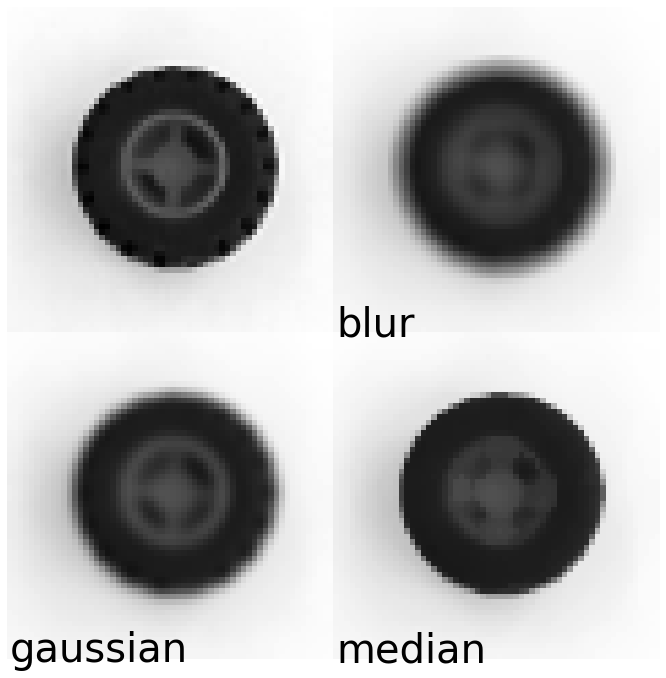

In [14]:
img_up = np.concatenate((img_roi, img_blur), axis=1)
img_down = np.concatenate((img_gaussian, img_median), axis=1)
img_all = np.concatenate((img_up, img_down), axis=0)
plt.figure(figsize = (ds,ds))
plt.imshow(img_all,'gray')
plt.text(w, h, "blur",fontsize=40)
plt.text(0, h*2, "gaussian",fontsize=40)
plt.text(w, h*2, "median",fontsize=40)
plt.axis('off')
plt.show()

In [15]:
img_pro = cv2.GaussianBlur(img_grey,(ksize,ksize),0)

#Image Pre-Process: Thresholding

(1)global,adaptive,otsu 

In [16]:
ret,img_global = cv2.threshold(img_pro,100,255,cv2.THRESH_BINARY)
img_adaptive = cv2.adaptiveThreshold(img_pro,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,127, 11)
ret2,img_otsu = cv2.threshold(img_pro,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

(2)display

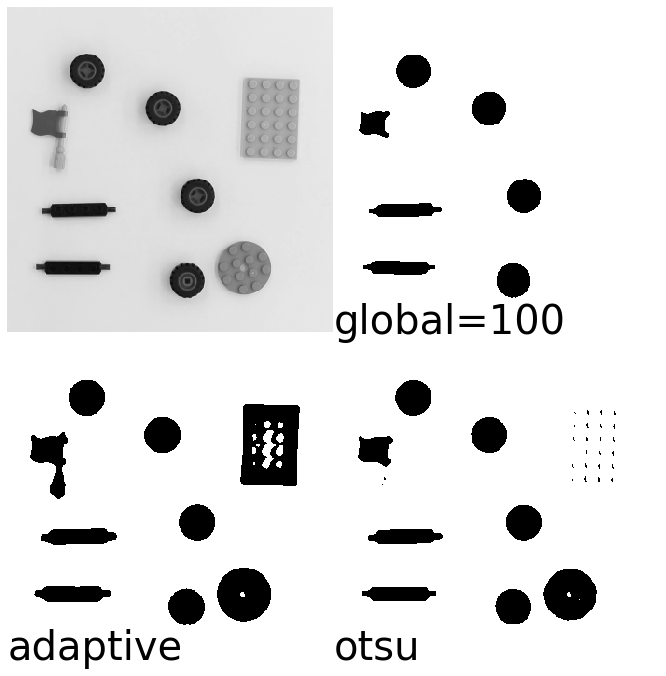

In [17]:
h,w=img_grey.shape
img_up = np.concatenate((img_grey, img_global), axis=1)
img_down = np.concatenate((img_adaptive, img_otsu), axis=1)
img_all = np.concatenate((img_up, img_down), axis=0)
plt.figure(figsize = (ds,ds))
plt.imshow(img_all,'gray')
plt.text(w, h, "global=100",fontsize=40)
plt.text(0, h*2, "adaptive",fontsize=40)
plt.text(w, h*2, "otsu",fontsize=40)
plt.axis('off')
plt.show()

In [18]:
img_pro=img_otsu.copy()

#Image Pre-Process: Morphological Transformations

(1)region of image

In [19]:
y1=240
h=80
x1=220
w=80
img_roi=img_otsu[y1:y1+h,x1:x1+w]

(2)kernel size and iterative number

In [20]:
ksize=3
itern=2
kernel = np.ones((ksize,ksize),np.uint8)

(3)erode,dilate,open

In [21]:
img_erode = cv2.erode(img_roi,kernel,itern)
img_dilate = cv2.dilate(img_roi,kernel,itern)
img_open = cv2.morphologyEx(img_roi, cv2.MORPH_OPEN, kernel)

(4)display

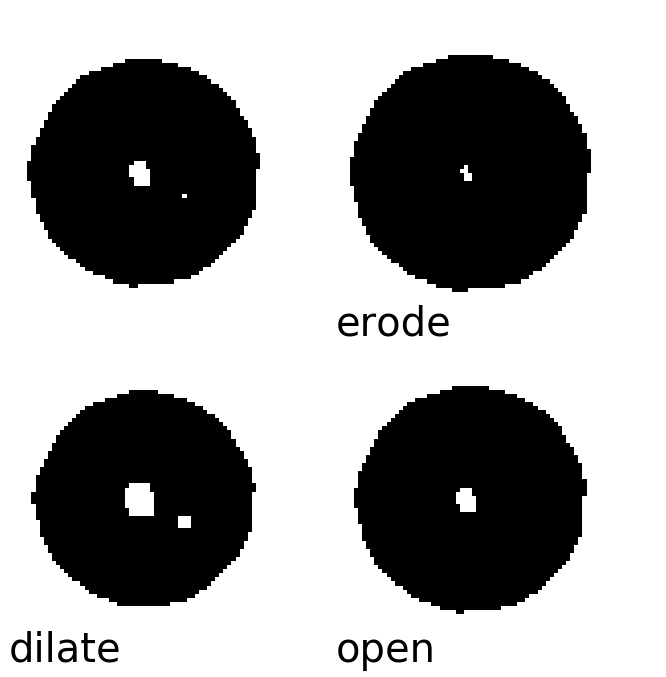

In [22]:
img_up = np.concatenate((img_roi, img_erode), axis=1)
img_down = np.concatenate((img_dilate, img_open), axis=1)
img_all = np.concatenate((img_up, img_down), axis=0)
plt.figure(figsize = (ds,ds))
plt.imshow(img_all,'gray')
plt.text(w, h, "erode",fontsize=40)
plt.text(0, h*2, "dilate",fontsize=40)
plt.text(w, h*2, "open",fontsize=40)
plt.axis('off')
plt.show()

In [23]:
img_pro=img_adaptive.copy()

#Segmentation: Contours

(1)contours calculation

In [24]:
contours,hierarchy = cv2.findContours(img_pro,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE )

(2)filter contours

In [25]:
print('hierarchy',hierarchy)

hierarchy [[[-1 -1  1 -1]
  [ 2 -1 -1  0]
  [ 3  1 -1  0]
  [ 5  2  4  0]
  [-1 -1 -1  3]
  [ 6  3 -1  0]
  [ 7  5 -1  0]
  [ 8  6 -1  0]
  [ 9  7 -1  0]
  [21  8 10  0]
  [11 -1 -1  9]
  [12 10 -1  9]
  [13 11 -1  9]
  [14 12 -1  9]
  [15 13 -1  9]
  [16 14 -1  9]
  [17 15 -1  9]
  [18 16 -1  9]
  [19 17 -1  9]
  [20 18 -1  9]
  [-1 19 -1  9]
  [-1  9 -1  0]]]


In [26]:
contour_filter=[]
img_contour=img_rgb.copy()
for i,contour in enumerate(contours):
    if hierarchy[0][i][3]==0:
        cv2.drawContours(img_contour, [contour], -1, (0,0,255), 2)  
        contour_filter.append(contour)

(3)display

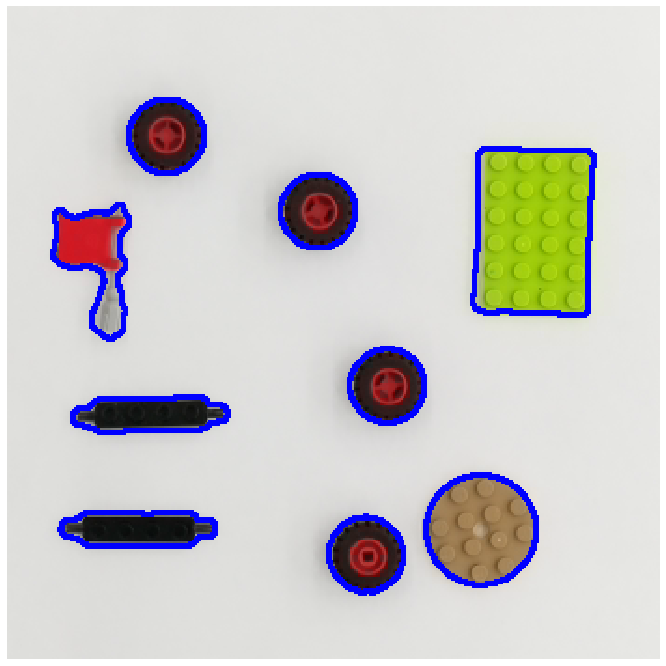

In [27]:
plt.figure(figsize = (ds,ds))
plt.imshow(img_contour)
plt.axis('off')
plt.show()

#Feature Extraction

In [28]:
area_list=[]
aspect_ratio_list=[]

img_feature=img_rgb.copy()
for i,contour in enumerate(contour_filter):
    #center of an object
    M = cv2.moments(contour)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    img = cv2.circle(img_feature,(cx,cy), 3, (255,0,0), -1)
    
    #The aspect ratio, which is the width divided by the height of the bounding rectangle
    x,y,w,h = cv2.boundingRect(contour)
    aspect_ratio = round(float(w)/h, 2)
    img = cv2.rectangle(img_feature,(x,y),(x+w,y+h),(0,255,0),2)
    img = cv2.putText(img_feature ,"aspect_ratio: "+str(aspect_ratio),(cx-50,cy+35),cv2.FONT_HERSHEY_SIMPLEX ,0.3,(0,0,255),1,cv2.LINE_AA) 

    #The area of an object
    area = cv2.contourArea(contour)
    img = cv2.putText(img_feature ,"area: "+str(int(area)),(cx-50,cy+25),cv2.FONT_HERSHEY_SIMPLEX ,0.3,(0,0,255),1,cv2.LINE_AA) 

    #The perimeter of an object
    perimeter = cv2.arcLength(contour,True)
    img = cv2.putText(img_feature ,"perimeter: "+str(int(perimeter)),(cx-50,cy+15),cv2.FONT_HERSHEY_SIMPLEX ,0.3,(0,0,255),1,cv2.LINE_AA) 
    img = cv2.putText(img_feature ,"number: "+str(i),(cx-50,cy+5),cv2.FONT_HERSHEY_SIMPLEX ,0.3,(0,0,255),1,cv2.LINE_AA) 

    area_list.append(area)
    aspect_ratio_list.append(aspect_ratio)

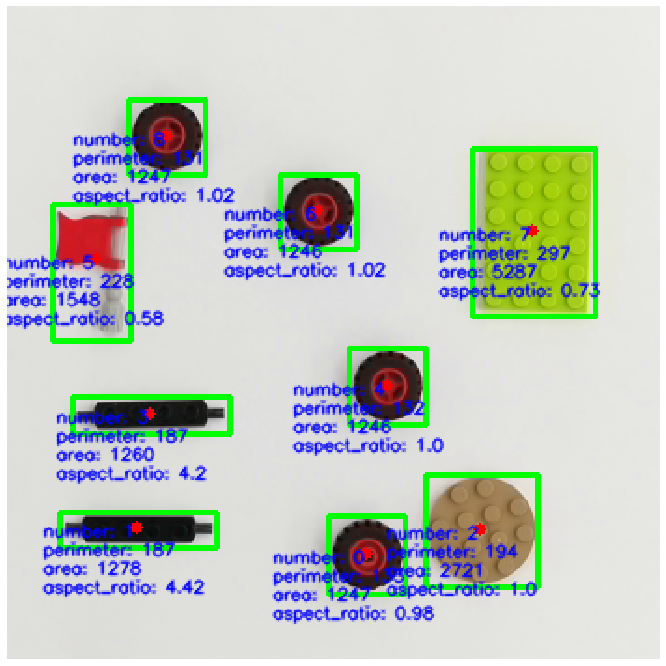

In [29]:
plt.figure(figsize = (ds,ds))
plt.imshow(img_feature)
plt.axis('off')
plt.show()

#Classification:train model

(1)tag the data

In [30]:
tag=['wheel','axle','disk','axle','wheel','flag','wheel','chasis','wheel']
tag_color={'wheel':'m','axle':'c','disk':'y','chasis':'g','flag':'r'}
tag_number={'wheel':'0','axle':'1','disk':'2','chasis':'3','flag':'4'}
number_tag={'0':'wheel','1':'axle','2':'disk','3':'chasis','4':'flag'}

newcomer_area=2000
newcomer_aspect_ratio=1.5
newcomer=[newcomer_area,newcomer_aspect_ratio]

(2)plot features space

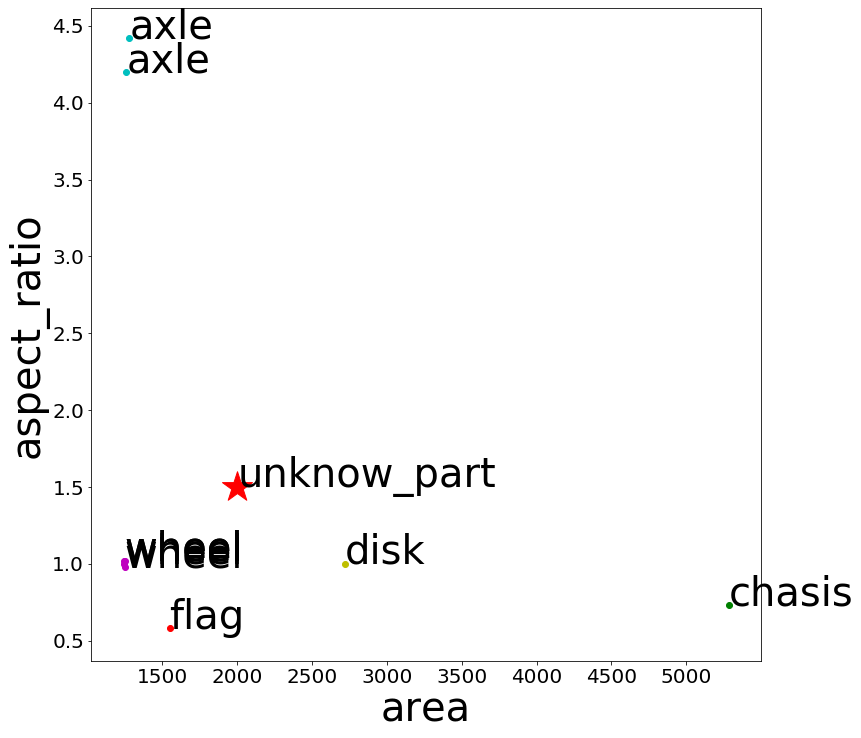

In [31]:
plt.figure(figsize = (ds,ds))

for i,t in enumerate(tag):
    plt.scatter(area_list[i],aspect_ratio_list[i],marker='o',color=tag_color[tag[i]])
    plt.text(area_list[i],aspect_ratio_list[i],t, fontsize=40)

    plt.xlabel('area',fontsize=40)
    plt.ylabel('aspect_ratio',fontsize=40)
    
    
plt.scatter(newcomer[0],newcomer[1],marker='*',s=1000,color='r')
plt.text(newcomer[0],newcomer[1],'unknow_part', fontsize=40)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()  

(3)normalize

In [32]:
trainData_x_norm = [float(i)/max(area_list) for i in area_list]
trainData_y_norm = [float(i)/max(aspect_ratio_list) for i in aspect_ratio_list]
newcomer=[newcomer[0]/max(area_list),newcomer[1]/max(aspect_ratio_list)]

(4) more data (simulation here)

In [33]:
def gen_random2d(x0=0,y0=0,r0=0.2):
    alpha = 2 * math.pi * random.random()
    r=r0 * math.sqrt(random.random())

    x = r * math.cos(alpha) + x0
    y = r * math.sin(alpha) + y0

    return x,y

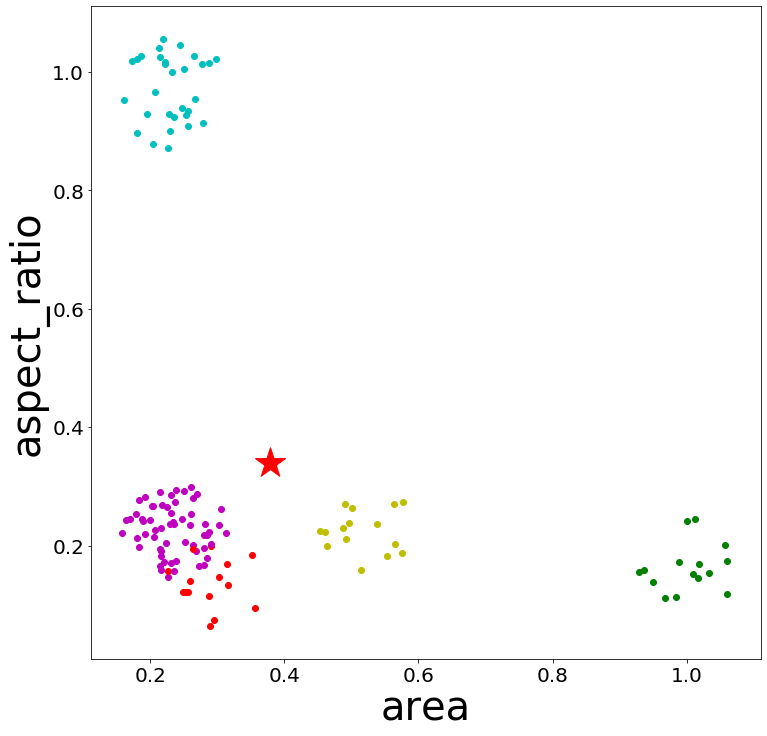

In [34]:
trainData_x=[]
trainData_y=[]
respones=[]

plt.figure(figsize = (ds,ds))

for i in range(len(trainData_x_norm)):
    x=trainData_x_norm[i]
    y=trainData_y_norm[i]
    for j in range(15):
        [xr,yr]=gen_random2d(x,y,0.08)
        trainData_x.append(xr) 
        trainData_y.append(yr)         
        respones.append(tag[i])
        
        plt.scatter(xr,yr,marker='o',color=tag_color[tag[i]])
        


plt.scatter(newcomer[0],newcomer[1],marker='*',s=1000,color='r')
plt.xlabel('area',fontsize=40)
plt.ylabel('aspect_ratio',fontsize=40)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()         

(5) define train data and response

In [35]:
trainData=[ [trainData_x[i],trainData_y[i]] for i in range(len(trainData_x))]
respones = [tag_number[item] for item in respones] 
print(respones)

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']


In [36]:
train_arr = np.array(trainData).astype('float32')
respones_arr = np.array(respones).astype('float32')
newcomer_arr = np.array([newcomer]).astype(np.float32)

(6)KNN model

In [37]:
knn=cv2.ml.KNearest_create()
knn.train(train_arr,cv2.ml.ROW_SAMPLE,respones_arr)
ret,results,neighbour,dist=knn.findNearest(newcomer_arr, 3)

In [38]:
print('results',results)
print('neighbour',neighbour)
print('results',dist)

results [[0.]]
neighbour [[0. 0. 0.]]
results [[0.01122194 0.01444689 0.01559631]]


In [39]:
print("new part is:",number_tag[str(int(results[0][0]))])

new part is: wheel


(7)save model

In [40]:
data = np.array([train_arr[:,0],train_arr[:,1],respones_arr])
data=data.T
print(data)

[[0.25122744 0.205622   0.        ]
 [0.23386975 0.23978789 0.        ]
 [0.2070756  0.22655608 0.        ]
 [0.26889414 0.19057438 0.        ]
 [0.21460767 0.193537   0.        ]
 [0.17036034 0.24395427 0.        ]
 [0.19234754 0.28130785 0.        ]
 [0.2268317  0.14644112 0.        ]
 [0.21520665 0.2910947  0.        ]
 [0.23075488 0.16990595 0.        ]
 [0.25886694 0.23479636 0.        ]
 [0.16367538 0.24294417 0.        ]
 [0.2733403  0.16560324 0.        ]
 [0.21619979 0.23029658 0.        ]
 [0.1576195  0.22066845 0.        ]
 [0.26560602 1.0265255  1.        ]
 [0.29783264 1.02175    1.        ]
 [0.20717752 0.96676916 1.        ]
 [0.21902378 1.0559927  1.        ]
 [0.18078691 1.021693   1.        ]
 [0.1728957  1.0180483  1.        ]
 [0.24726653 0.93987757 1.        ]
 [0.21296352 1.039723   1.        ]
 [0.2531036  0.9266886  1.        ]
 [0.1859448  1.0261908  1.        ]
 [0.25670603 0.93445903 1.        ]
 [0.27676925 1.0128822  1.        ]
 [0.24452603 1.0454769  1.  

In [41]:
datafile_path = "train_model.txt"
with open(datafile_path, 'w+') as datafile_id:
    np.savetxt(datafile_id, data)

#Classification:prediction

(1)Load model

In [42]:
f=open('train_model.txt',"r")
lines=f.readlines()

trainData_x=[]
trainData_y=[]
respones=[]

for x in lines:
    x=x.strip("\n")
    trainData_x.append(x.split(' ')[0])
    trainData_y.append(x.split(' ')[1])
    respones.append(x.split(' ')[2])
    
    
f.close()

(2)prediction

In [43]:
trainData=[ [trainData_x[i],trainData_y[i]] for i in range(len(trainData_x))]
train_arr = np.array(trainData).astype('float32')
respones_arr = np.array(respones).astype('float32')

(3)display

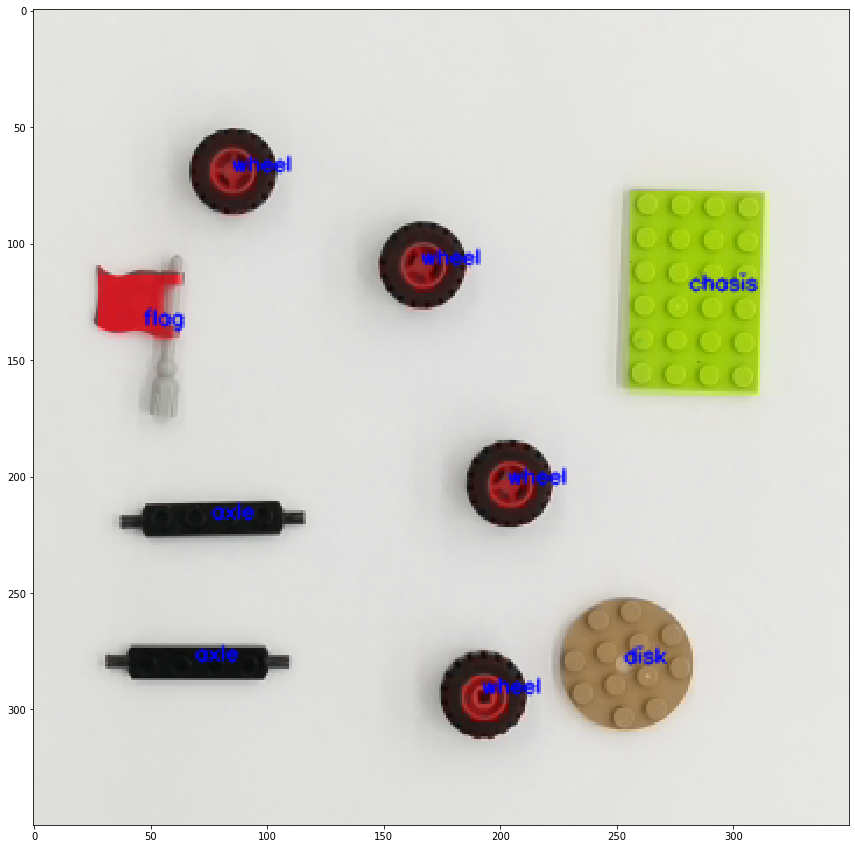

In [44]:
parts_list=[]
for i,contour in enumerate(contour_filter):

    M = cv2.moments(contour)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    
    newcomer=[area_list[i]/max(area_list),aspect_ratio_list[i]/max(aspect_ratio_list)]   
    newcomer_arr = np.array([newcomer]).astype(np.float32)
    
    ret,results,neighbour,dist=knn.findNearest(newcomer_arr, 5)    
    img_new = cv2.putText(img_rgb ,number_tag[str(int(results[0][0]))],(cx,cy),cv2.FONT_HERSHEY_SIMPLEX ,0.3,(0,0,255),1,cv2.LINE_AA) 
    parts_list.append(number_tag[str(int(results[0][0]))])

plt.figure(figsize = (15,15))
plt.imshow(img_new)
plt.show()  

In [45]:
#Post-process

In [46]:
count={'wheel':0,'axle':0,'disk':0,'flag':0,'chasis':0}
for part in parts_list:
    count[part]=count[part]+1

In [47]:
print('result',count)

result {'wheel': 4, 'axle': 2, 'disk': 1, 'flag': 1, 'chasis': 1}


In [48]:
print('Pass!')

Pass!
